In [25]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

experiment_no=0


In [26]:

# load data
(x,y),(x_test,y_test)=mnist.load_data()
x_train= x[:500]
y_train= y[:500]

x_val= x[500:600]
y_val= y[500:600]


print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')





x_train shape: (500, 28, 28)
y_train shape: (500,)
x_val shape: (100, 28, 28)
y_val shape: (100,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Epoch 1/2


/home/silicon/opencv_learn/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.1772 - loss: 16.5536 - val_accuracy: 0.2300 - val_loss: 2.4467
Epoch 2/2
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3440 - loss: 1.9352 - val_accuracy: 0.2400 - val_loss: 2.1246
Test Loss: 2.0754, Test Accuracy: 0.3528
Training history saved to: /home/silicon/opencv_learn/AI/experiment_1/train.csv
Test results saved to: /home/silicon/opencv_learn/AI/experiment_1/test.csv


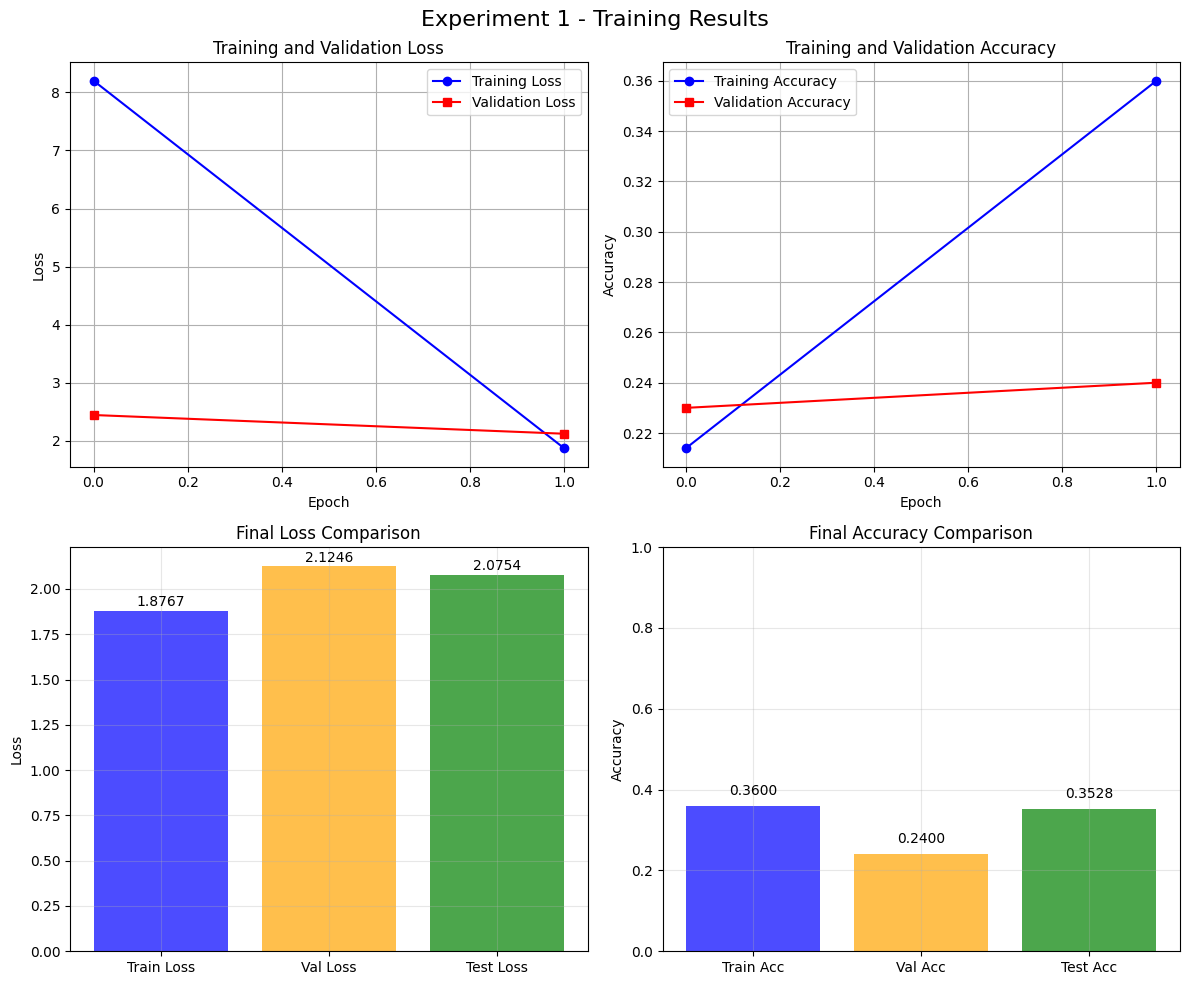

Graph saved to: /home/silicon/opencv_learn/AI/experiment_1/graph.png


In [28]:
model = Sequential([
    Conv2D(filters=8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

# model.summary(show_trainable=True)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_val, y_val))

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

history_keys = history.history.keys()
keys = ['experiment_no', 'epochs'] + list(history_keys)

# Create experiment directory
dir_path = os.getcwd()
new_dir = os.path.join(dir_path, f'experiment_{experiment_no}')
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

train_file_path = os.path.join(new_dir, f'train.csv')
test_file_path = os.path.join(new_dir, f'test.csv')
graph_path = os.path.join(new_dir, f'graph.png')

# Save training history to train.csv in experiment folder
with open(train_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(keys)  # write header
    
    # Write training data for each epoch
    for epoch in range(len(history.history['loss'])):
        row = [experiment_no, epoch + 1]
        for key in history_keys:
            row.append(history.history[key][epoch])
        writer.writerow(row)

print(f"Training history saved to: {train_file_path}")

# Save test results to test.csv in experiment folder
test_keys = ['experiment_no', 'test_loss', 'test_accuracy']
with open(test_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(test_keys)  # write header
    writer.writerow([experiment_no, test_loss, test_accuracy])  # write test results

print(f"Test results saved to: {test_file_path}")

# Create and save graphs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle(f'Experiment {experiment_no} - Training Results', fontsize=16)

# Plot 1: Training and Validation Loss
axes[0, 0].plot(history.history['loss'], 'b-', label='Training Loss', marker='o')
axes[0, 0].plot(history.history['val_loss'], 'r-', label='Validation Loss', marker='s')
axes[0, 0].set_title('Training and Validation Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Training and Validation Accuracy
axes[0, 1].plot(history.history['accuracy'], 'b-', label='Training Accuracy', marker='o')
axes[0, 1].plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', marker='s')
axes[0, 1].set_title('Training and Validation Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Final Metrics Comparison
final_metrics = ['Train Loss', 'Val Loss', 'Test Loss']
final_values = [history.history['loss'][-1], history.history['val_loss'][-1], test_loss]
axes[1, 0].bar(final_metrics, final_values, color=['blue', 'orange', 'green'], alpha=0.7)
axes[1, 0].set_title('Final Loss Comparison')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].grid(True, alpha=0.3)

# Add values on bars
for i, v in enumerate(final_values):
    axes[1, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# Plot 4: Final Accuracy Comparison
acc_metrics = ['Train Acc', 'Val Acc', 'Test Acc']
acc_values = [history.history['accuracy'][-1], history.history['val_accuracy'][-1], test_accuracy]
axes[1, 1].bar(acc_metrics, acc_values, color=['blue', 'orange', 'green'], alpha=0.7)
axes[1, 1].set_title('Final Accuracy Comparison')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].grid(True, alpha=0.3)

# Add values on bars
for i, v in enumerate(acc_values):
    axes[1, 1].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(graph_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Graph saved to: {graph_path}")


In [6]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3841 - loss: 1.9767


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted digit: 6


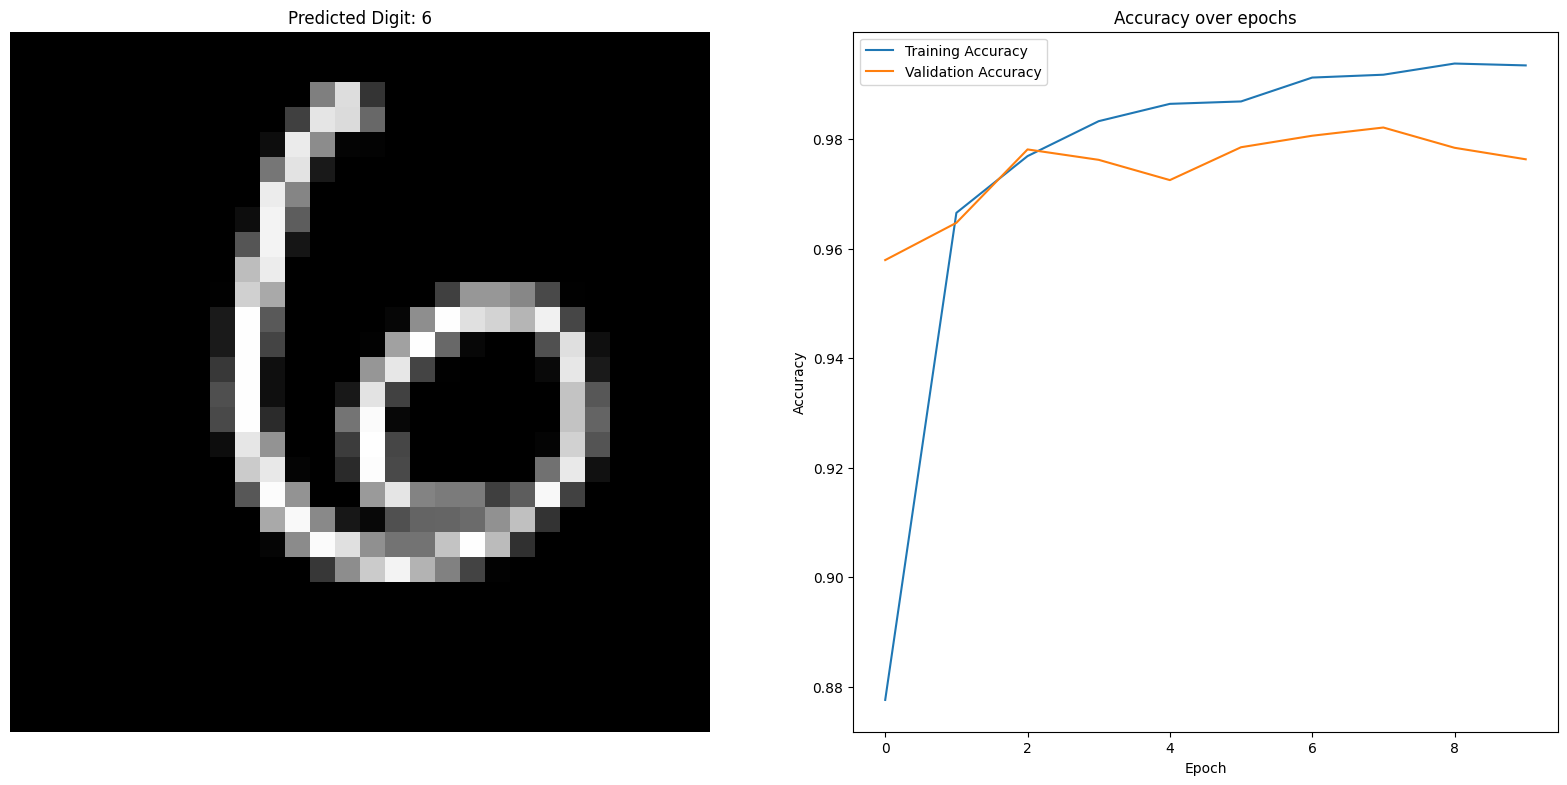

In [16]:

# visualize a sample

test_image = x_test[100] 

prediction = model.predict(test_image[np.newaxis, ...])
predicted_label = np.argmax(prediction)
print("Predicted digit:", predicted_label)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted Digit: {predicted_label}')
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.show()
